In [135]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from scipy import stats
import math

In [136]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Q1: Save the dataset into pandas dataframe

In [137]:

df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

# Print the first few rows of the dataframe
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Q2: Use different histograms to plot features that have right, left and zero skew.

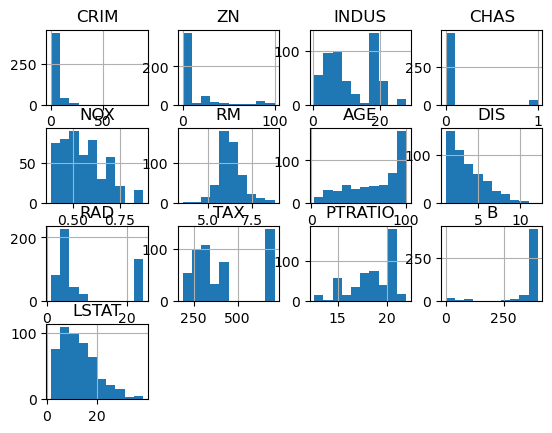

In [138]:
df_boston.hist();

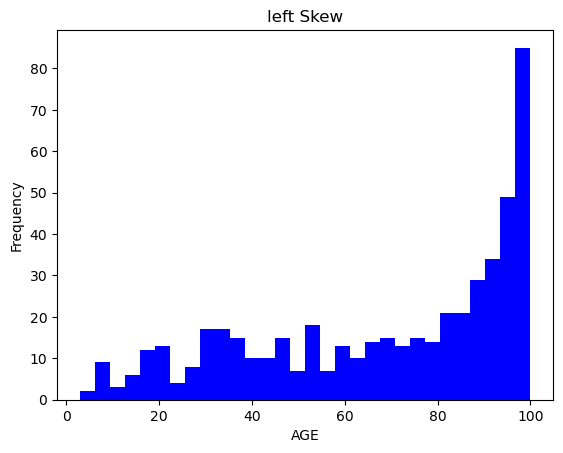

In [139]:
plt.hist(df_boston['AGE'], bins=30, color='blue')
plt.title('left Skew')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

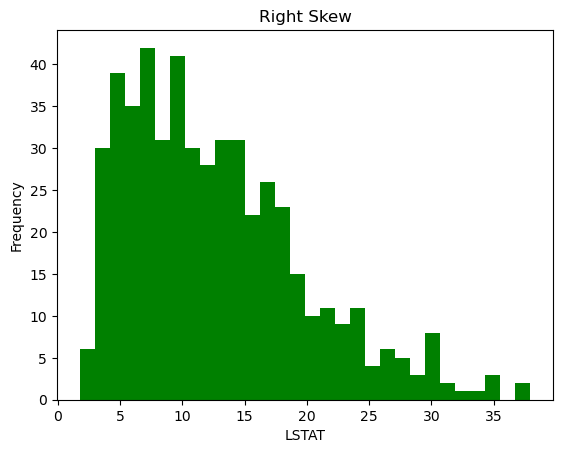

In [140]:
plt.hist(df_boston['LSTAT'], bins=30, color='green')
plt.title('Right Skew')
plt.xlabel('LSTAT')
plt.ylabel('Frequency')
plt.show()


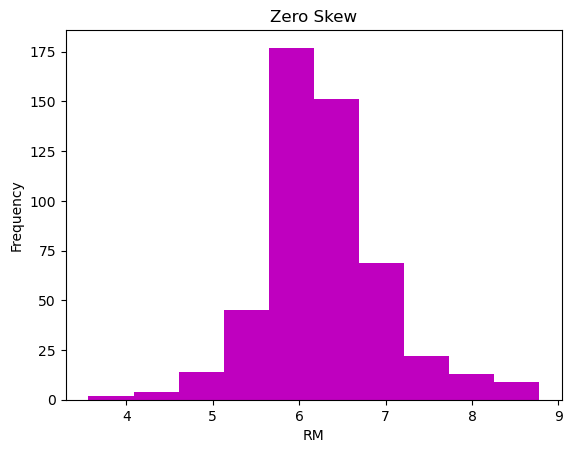

In [141]:
plt.hist(df_boston['RM'],  color='m')
plt.title('Zero Skew')
plt.xlabel('RM')
plt.ylabel('Frequency')
plt.show()


## Q3: Prove your previous result using mean, median and mode.

￼

￼

In [142]:



feature_values = df_boston['AGE']

mean = np.mean(feature_values)
median = np.median(feature_values)
mode = stats.mode(feature_values)
print('''
    Mean: {}
    Median: {}
    Mode: {}
'''.format(mean,median,mode.mode[0]))



    Mean: 68.57490118577078
    Median: 77.5
    Mode: 100.0



In [143]:
feature_values = df_boston['LSTAT']

mean = np.mean(feature_values)
median = np.median(feature_values)
mode = stats.mode(feature_values)

print('''
    Mean: {}
    Median: {}
    Mode: {}
'''.format(mean,median,mode.mode[0]))


    Mean: 12.653063241106723
    Median: 11.36
    Mode: 6.36



In [144]:
feature_values = df_boston['RM']

mean = np.mean(feature_values)
median = np.median(feature_values)
mode = stats.mode(feature_values)

print('''
    Mean: {}
    Median: {}
    Mode: {}
'''.format(mean,median,mode.mode[0]))


    Mean: 6.284634387351787
    Median: 6.2085
    Mode: 5.713



## Q4: Use Skew function of Pandas to print skewness of each feature.

In [145]:
skewness = df_boston.skew()

print(skewness)

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
dtype: float64


## Q5: Use numpy to draw normal distribution.

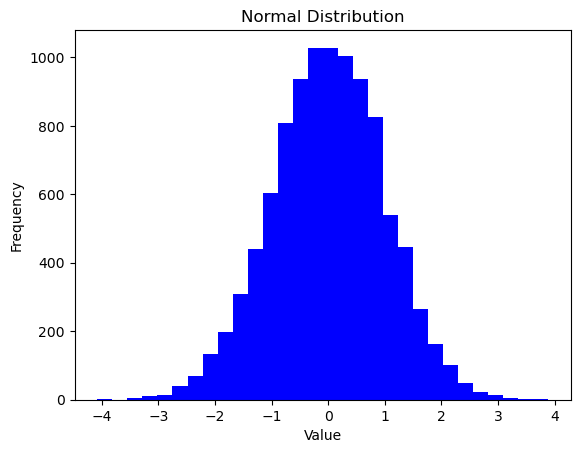

In [146]:

data = np.random.normal(0, 1, 10000)#mean,standard deviation,number of samples
plt.hist(data,bins=30, color='blue')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Q6: Use numpy to draw uniform distribution.

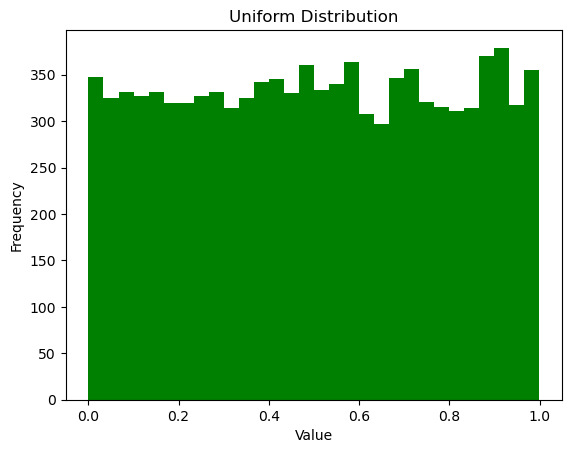

In [147]:
data = np.random.uniform(0, 1, 10000)#lower bound,upper bound,number of samples
plt.hist(data, bins=30, color='green')
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Q7: Use numpy to draw binomial distribution.

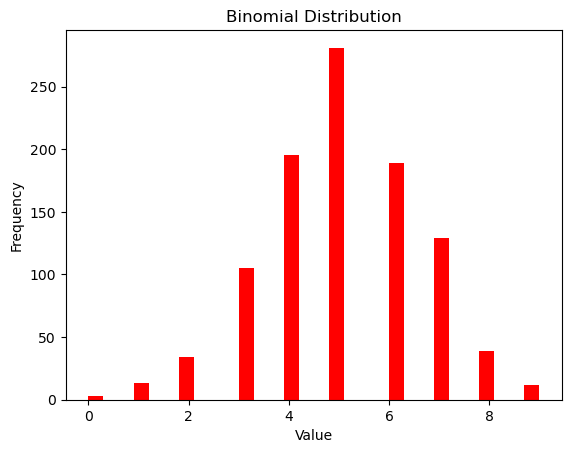

In [148]:
data = np.random.binomial(10,0.5,1000)

# Plot the histogram of the generated data
plt.hist(data, bins=30, color='red')
plt.title('Binomial Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Q8: Simulate Two Coin Flips, then draw the result distribution.

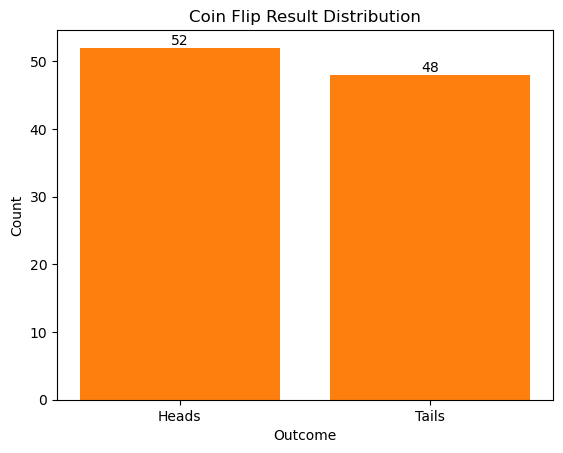

In [149]:
coin_flips = np.random.choice(['Head', 'Tail'], size=100, p=[0.5, 0.5])
# print(coin_flips)
# Count the occurrences of each outcome
heads_count = np.sum(coin_flips == 'Head')
tails_count = np.sum(coin_flips == 'Tail')

# Plot the distribution of the results
coin = ['Heads', 'Tails']
counts = [heads_count, tails_count]

plt.bar(coin, counts)
plt.bar_label(plt.bar(coin, counts))
plt.title('Coin Flip Result Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

## Q9: Summary of Descriptive Statistics

1. Using scipy.stats
- nobs: the number of observations or elements in your dataset
- minmax: the tuple with the minimum and maximum values of your dataset
- mean: the mean of your dataset
- variance: the variance of your dataset
- skewness: the skewness of your dataset
- kurtosis: the kurtosis of your dataset

In [150]:
stats.describe(df_boston)


DescribeResult(nobs=506, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ])), mean=array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01]), variance=array([7.39865782e+01, 5.43936814e+02, 4.70644425e+01, 6.45129730e-02,
       1.34276357e-02, 4.93670850e-01, 7.92358399e+02, 4.43401514e+00,
       7.58163660e+01, 2.84047595e+04, 4.68698912e+00, 8.33475226e+03,
       5.09947595e+01]), skewness=array([ 5.20765239,  2.21906306,  0.29414628,  3.39579929,  0.72714416,
        0.40241467, -0.59718559,  1.00877876,  1.00183349,  0.6

2. method .describe()
- count: the number of elements in your dataset
- mean: the mean of your dataset
- std: the standard deviation of your dataset
- min and max: the minimum and maximum values of your dataset
- 25%, 50%, and 75%: the quartiles of your dataset

In [151]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Q9: Summarize the differences between the Z-test and the T-test in three sentences.

- The Z-test is used when the population standard deviation is known, while the T-test is used when the population standard deviation is unknown and needs to be estimated from the sample.
- The Z-test assumes a normal distribution of the population, while the T-test is more robust and can be used even if the population distribution is not exactly normal, as long as the sample size is sufficiently large.
- The Z-test is appropriate for large sample sizes, whereas the T-test is more suitable for smaller sample sizes.

## Calculate

Let's assume that a class's average score is higher than 70 with a standard deviation of 10.
Calculate the Z-value to determine whether there is sufficient data to support this claim at a 0.05 
significance level if a sample of 50 students was chosen and their mean score was 80.

In [155]:
Z =(80-70)/(10/(50**0.5))
Z




7.0710678118654755

An establishment wants to boost sales. According to past sales data, each sale made by 30 salesmen averaged 
40 dollar. The most recent data indicated that an average sale per transaction was 60 dollar after some training.Find the t-value for a 20 dollar standard deviation. Did a training program increase sales?

In [153]:
t_value = (60 - 40) / (20 / (30 ** 0.5))
t_value
#t-value is greater than the critical t-value 
#the training program has increased in sales.

5.477225575051661

### t-value is greater than the critical t-value 
### the training program has increased in sales.